
**The Side Table library in Python (sidetable, often used with stb) is a helpful tool for exploratory data analysis (EDA), especially for quickly summarizing categorical data and understanding distributions within the dataset.**

**The new sidetable package adds convenience methods to DataFrames. These methods make it easier to see missing values, counts of values per column, subtotals,grand totals and flattening hierarchical columns .**

In [2]:
#https://pypi.org/project/sidetable/
#https://pbpython.com/sidetable.html
##https://towardsdatascience.com/sidetable-gives-you-the-pandas-methods-you-didnt-know-you-needed-92be825ff512
""" For Data set : https://github.com/chris1610/pbpython/tree/master/data"""

' For Data set : https://github.com/chris1610/pbpython/tree/master/data'

# Sidetable - Create Simple Summary Tables in Pandas

<span style="font-size: 18px;">
    
> * sidetable started as a supercharged combination of pandas value_counts plus crosstab that builds simple but useful summary tables of your pandas DataFrame. It has since expanded to provide support for common and useful pandas tasks such as adding subtotals to your DataFrame or flattening hierarchical columns

</span>

In [5]:
import sidetable as std
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv("school_transform.csv")

In [7]:
df.head(2)

,Unnamed: 0,School Name,City,State,District Name,Model Selected,Award_Amount,Region
0,0,HOGARTH KINGEEKUK MEMORIAL SCHOOL,SAVOONGA,AK,BERING STRAIT SCHOOL DISTRICT,Transformation,471014,West
1,1,AKIACHAK SCHOOL,AKIACHAK,AK,YUPIIT SCHOOL DISTRICT,Transformation,520579,West


In [8]:
"""The unnamed column in your DataFrame might be caused by an extra column in the CSV file, such as an index
column that was saved without a header name."""

'The unnamed column in your DataFrame might be caused by an extra column in the CSV file, such as an index\ncolumn that was saved without a header name.'

> * Check for an Index Column: The unnamed column could be an index column saved without a header. You can set index_col=0 when reading the CSV to ignore it.
df = pd.read_csv("school_transform.csv", index_col=0)
 
> * Check for Extra Columns: If there is a column without a header in the CSV file, it might show up as "Unnamed." You can try specifying header=0 to force the first row to be used as the header:
df = pd.read_csv("school_transform.csv", header=0)
 
> * Remove Unnamed Columns: If the unnamed column is not needed, you can drop it after loading the CSV:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]


In [10]:
df = pd.read_csv("school_transform.csv", index_col=0) # set index_col=0 when reading the CSV to ignore it.
df.head(2)

,School Name,City,State,District Name,Model Selected,Award_Amount,Region
0,HOGARTH KINGEEKUK MEMORIAL SCHOOL,SAVOONGA,AK,BERING STRAIT SCHOOL DISTRICT,Transformation,471014,West
1,AKIACHAK SCHOOL,AKIACHAK,AK,YUPIIT SCHOOL DISTRICT,Transformation,520579,West


In [11]:
df1 = pd.read_csv('https://github.com/chris1610/pbpython/blob/master/data/school_transform.csv?raw=True', index_col=0)

In [12]:
df1.head(2)

,School Name,City,State,District Name,Model Selected,Award_Amount,Region
0,HOGARTH KINGEEKUK MEMORIAL SCHOOL,SAVOONGA,AK,BERING STRAIT SCHOOL DISTRICT,Transformation,471014,West
1,AKIACHAK SCHOOL,AKIACHAK,AK,YUPIIT SCHOOL DISTRICT,Transformation,520579,West


**Without SideTable**

In [14]:
df['State'].value_counts().head(2)

State
CA    92
FL    71
Name: count, dtype: int64

In [15]:
df['State'].value_counts(normalize=True).head(2)

State
CA    0.121532
FL    0.093791
Name: proportion, dtype: float64

**With Sidetable**

In [17]:
df.stb.freq(['State']).head(2)

,State,count,percent,cumulative_count,cumulative_percent
0,CA,92,12.153236,92,12.153236
1,FL,71,9.379128,163,21.532365


In [18]:
#df.stb.freq(['State'],style=True).head(2) #AttributeError: 'Styler' object has no attribute 'head'

In [19]:
#df.stb.freq(['State'],style=True)
df.stb.freq(['State']).head(2).style


,State,count,percent,cumulative_count,cumulative_percent
0,CA,92,12.153236,92,12.153236
1,FL,71,9.379128,163,21.532365


## What if we want a quick view of the states that contribute around 50% of the total? Use the thresh argument to group all of the rest into an “Others” category:

In [21]:
df.stb.freq(['State'], thresh=.5) # don't use .5 

,State,count,percent,cumulative_count,cumulative_percent
0,others,757,100.0,757,100.0


In [22]:
"""Ensure stb is imported: The stb module is part of the pandas_profiling package. 
Ensure you have it imported correctly: """

import ydata_profiling as pp

In [23]:
df['State'] = df['State'].astype('category')
print(df.dtypes)

School Name         object
City                object
State             category
District Name       object
Model Selected      object
Award_Amount         int64
Region              object
dtype: object


In [24]:
df.stb.freq(['State'], thresh=50) # don't use .5 

,State,count,percent,cumulative_count,cumulative_percent
0,CA,92,12.153236,92,12.153236
1,FL,71,9.379128,163,21.532365
2,PA,58,7.661823,221,29.194188
3,OH,35,4.623514,256,33.817701
4,MO,32,4.227213,288,38.044914
5,MI,28,3.698811,316,41.743725
6,GA,26,3.434610,342,45.178336
7,NY,25,3.302510,367,48.480845
8,others,390,51.519155,757,100.000000


> * INSIGHTS : 8 states contributed almost 50% of the total and all the other states account for the remainder.

**we can rename the catch-all category using other_label**

In [27]:
df.stb.freq(['State'], thresh=50, other_label='Rest of states')

,State,count,percent,cumulative_count,cumulative_percent
0,CA,92,12.153236,92,12.153236
1,FL,71,9.379128,163,21.532365
2,PA,58,7.661823,221,29.194188
3,OH,35,4.623514,256,33.817701
4,MO,32,4.227213,288,38.044914
5,MI,28,3.698811,316,41.743725
6,GA,26,3.434610,342,45.178336
7,NY,25,3.302510,367,48.480845
8,Rest of states,390,51.519155,757,100.000000


## One of the useful features of sidetable is that it can group columns together to further understand the distribution. For instance, what if we want to see how the various “Transformation Models” are applied across Regions?

In [29]:
#df.columns
df.head(2)

,School Name,City,State,District Name,Model Selected,Award_Amount,Region
0,HOGARTH KINGEEKUK MEMORIAL SCHOOL,SAVOONGA,AK,BERING STRAIT SCHOOL DISTRICT,Transformation,471014,West
1,AKIACHAK SCHOOL,AKIACHAK,AK,YUPIIT SCHOOL DISTRICT,Transformation,520579,West


In [30]:
df.stb.freq(['Region', 'Model Selected'])

,Region,Model Selected,count,percent,cumulative_count,cumulative_percent
0,South,Transformation,185,24.765730,185,24.765730
1,West,Transformation,142,19.009371,327,43.775100
2,Midwest,Transformation,111,14.859438,438,58.634538
3,Northeast,Transformation,102,13.654618,540,72.289157
4,West,Turnaround,49,6.559572,589,78.848728
5,South,Turnaround,44,5.890228,633,84.738956
6,Midwest,Turnaround,43,5.756359,676,90.495315
7,Northeast,Turnaround,25,3.346720,701,93.842035
8,South,Restart,11,1.472557,712,95.314592
9,Northeast,Restart,9,1.204819,721,96.519411


> * This view is a quick way to understand the interaction and distribution of the various data elements. I find that this is an easy way to explore data and get some insights that might warrant further analysis. A table like this is also easy to share with others since it is relatively simple to understand.

### What might be much more interesting is looking at the total breakdown by Award Amount . sidetable allows you to pass a value column that can be summed (instead of counting occurrences).

In [33]:
df.head(1)

,School Name,City,State,District Name,Model Selected,Award_Amount,Region
0,HOGARTH KINGEEKUK MEMORIAL SCHOOL,SAVOONGA,AK,BERING STRAIT SCHOOL DISTRICT,Transformation,471014,West


In [34]:
df.stb.freq(['Region'], value='Award_Amount') # value= numeric value 

,Region,Award_Amount,percent,cumulative_Award_Amount,cumulative_percent
0,South,117467481,37.314735,117467481,37.314735
1,West,74418552,23.639807,191886033,60.954542
2,Midwest,65736175,20.881762,257622208,81.836304
3,Northeast,57179654,18.163696,314801862,100.000000


> * This view gives us insight that the Northeast has the least amount of dollars spent on these projects and that 37% of the total spend went to schools in the South region.



In [36]:
df.stb.freq(['State'], value='Award_Amount').head(2)

,State,Award_Amount,percent,cumulative_Award_Amount,cumulative_percent
0,FL,43138859,13.523102,43138859,13.523102
1,PA,28348080,8.886512,71486939,22.409614


## Finally, we can look at the types of models selected and determine the 80/20 breakdown of the allocated dollars:



In [38]:
df.stb.freq(['Region', 'Model Selected'],
             value='Award_Amount', thresh=80,
             other_label='Remaining')

,Region,Model Selected,Award_Amount,percent,cumulative_Award_Amount,cumulative_percent
0,South,Transformation,88680032,28.170110,88680032,28.170110
1,West,Transformation,56207890,17.855006,144887922,46.025116
2,Midwest,Transformation,48702505,15.470844,193590427,61.495960
3,Northeast,Transformation,41263161,13.107661,234853588,74.603621
4,Remaining,Remaining,79948274,25.396379,314801862,100.000000


## If you’re familiar with pandas crosstab, then one way to look at sidetable is that it is an expanded version of a crosstab with some convenience functions to view the data more easily:

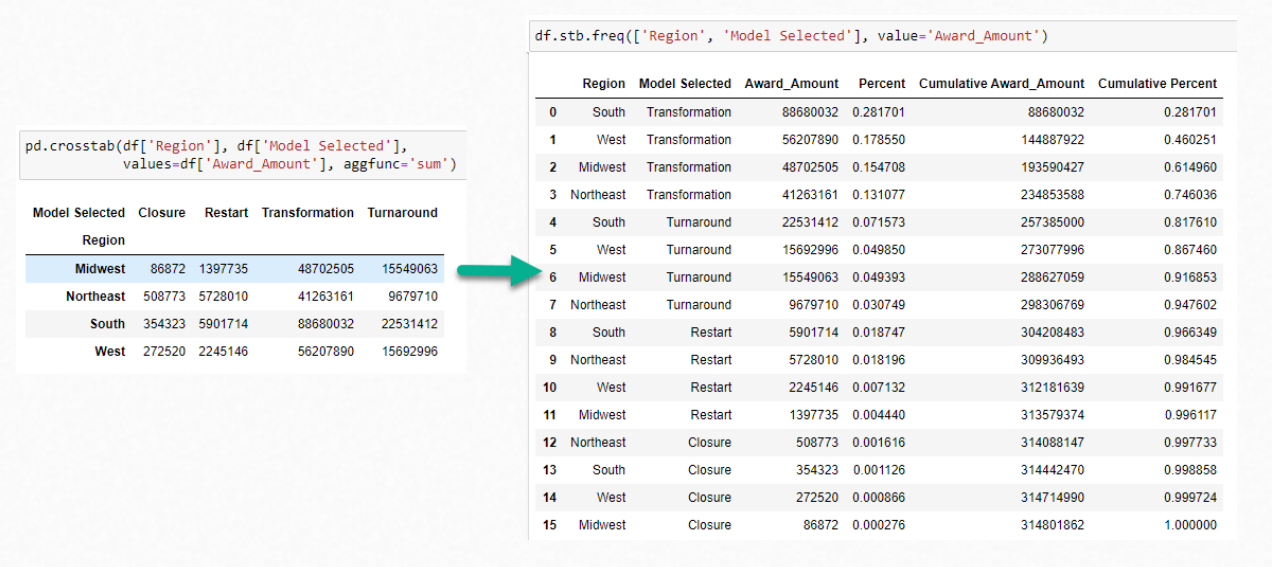

In [40]:
from IPython.display import Image
Image("ExpandedCrossTab.png")

## How to add other functions to the library, here’s an example of building a simple missing values table:

In [42]:
df.stb.missing()

,missing,total,percent
Region,10,757,1.321004
School Name,0,757,0.000000
City,0,757,0.000000
State,0,757,0.000000
District Name,0,757,0.000000
Model Selected,0,757,0.000000
Award_Amount,0,757,0.000000


>* INSIGHTS: there are 10 missing values in the Region column that represent a little less than 1.3% of the total values in that column.

**Finally, the functionality in missing is not meant to be a replacement for the excellent missingno module. The implementation included in sidetable is a quick summary version and does not include any of the useful visualizations in missingno.**

In [45]:
df.stb.freq(['State', 'City'])
"""combination of State and City as appears N times."""

'combination of State and City as appears N times.'

> * Summary
The sidetable library is important in EDA because it simplifies categorical data exploration, reveals patterns within combinations of columns, and supports data cleaning by making it easy to assess distributions and identify rare categories or data quality issues.


> * Data Quality Checks
sidetable can reveal data quality issues, such as unexpected values, categories with very low counts, or high proportions of missing data.
Identifying these issues early helps in making more informed decisions during data cleaning and preparation.

> * Percentage Calculations
Along with counts, sidetable also provides percentages, which are often useful in understanding the relative proportions of each category.
Percentage summaries can highlight the distribution's balance or imbalance, helping to make decisions about data handling, like whether to drop or combine certain categories.

>* Thresholding for "Other" Category
sidetable allows you to set a thresh parameter, grouping less frequent categories into an "Others" category.
This feature is valuable for simplifying visualizations by reducing the number of categories in charts or tables, especially when certain categories have very low counts.

> * Multi-level Grouped Frequency Tables
You can calculate the frequency of combinations of multiple categorical variables (e.g., state and city).
This is useful when analyzing relationships between categorical variables to detect patterns or trends in data.

> * Frequency Distribution of Categorical Variables
sidetable makes it easy to generate frequency counts for single or multiple categorical columns.
This allows you to quickly see the distribution of values, which can help identify the dominant categories, skewed distributions, or rare categories that might need attention (e.g., combining categories with low counts).
